In [9]:
constraint = 25
show = True


### SafetyHalfCheetahVelocity-v1

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')

task = 'SafetyHalfCheetahVelocity-v1'
runs = ['FOCOPS','CUP','CPO','PPO-lag','PPO-unconstraint','SIM']
num_seed=4
save_path = f'./figures/{task}'
step_size = 20000

run_dirs = {
    'PPO-unconstraint'      :f'.\log_data\{task}\PPO-unconstraint',
    'PPO-lag'               :f'.\log_data\{task}\PPO-lag',
    'SIM'      :f'.\log_data\{task}\SIM',
    'FOCOPS'                :f'.\log_data\{task}\FOCOPS',
    'CUP'                   :f'.\log_data\{task}\CUP',
    'CPO'                   :f'.\log_data\{task}\CPO',
}

run_colors = {
    'PPO-lag'               :cmap.colors[0],
    'FOCOPS'                :cmap.colors[5],
    'CUP'                   :cmap.colors[2],
    'CPO'                   :cmap.colors[7],
    'SIM'      :cmap.colors[3],
    'PPO-unconstraint'      :cmap.colors[4],
}

line_widths = {
    'PPO-lag'               :3,
    'FOCOPS'                :3,
    'CUP'                   :3,
    'CPO'                   :3,
    'SIM'      :4,
    'PPO-unconstraint'      :3,
}

run_labels = {
    'PPO-lag'               :'PPO-lag',
    'SIM'      :'Ours',
    'FOCOPS'                :'FOCOPS',
    'CUP'                   :'CUP',
    'CPO'                   :'CPO',
    'PPO-unconstraint'      :'PPO-unconstraint',
}

run_lines = {
    'PPO-lag'               :'-',
    'SIM'      :'-',
    'FOCOPS'                :'-',
    'CUP'                   :'-',
    'CPO'                   :'-',
    'PPO-unconstraint'      :'-'
}


def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr

try:
    os.mkdir(save_path)
except OSError as error:
    print(error)   

[WinError 3] The system cannot find the path specified: './figures/SafetyHalfCheetahVelocity-v1'


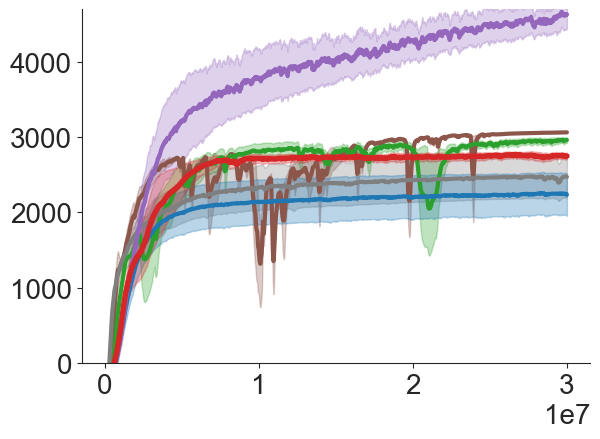

In [11]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []

    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 4700)) # set the ylim to bottom, top
plt.ylim(0, 4700) # set the ylim to bottom, top
# plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

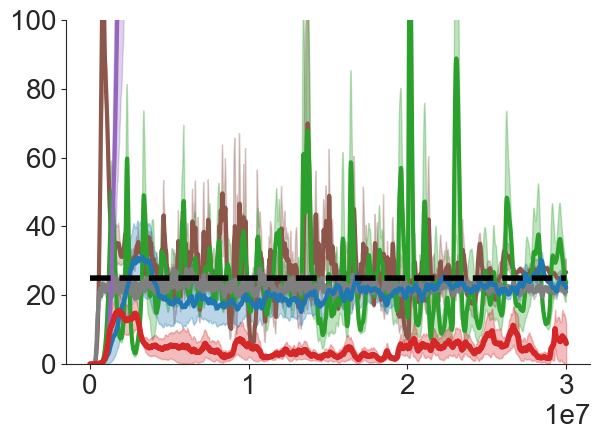

In [12]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []

    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=4
, label='Constraint')
# plt.legend()
bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 100)) # set the ylim to bottom, top
plt.ylim(0, 100) # set the ylim to bottom, top

plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

### SafetyAntVelocity-v1

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')

task = 'SafetyAntVelocity-v1'
runs = ['FOCOPS','CUP','CPO','PPO-lag','PPO-unconstraint','SIM']

num_seed=4
save_path = f'./figures/{task}'
step_size = 20000

run_dirs = {
    'PPO-unconstraint'      :f'.\log_data\{task}\PPO-unconstraint',
    'PPO-lag'               :f'.\log_data\{task}\PPO-lag',
    'SIM'      :f'.\log_data\{task}\SIM',
    'FOCOPS'                :f'.\log_data\{task}\FOCOPS',
    'CUP'                   :f'.\log_data\{task}\CUP',
    'CPO'                   :f'.\log_data\{task}\CPO',
}

run_colors = {
    'PPO-lag'               :cmap.colors[0],
    'FOCOPS'                :cmap.colors[5],
    'CUP'                   :cmap.colors[2],
    'CPO'                   :cmap.colors[7],
    'SIM'      :cmap.colors[3],
    'PPO-unconstraint'      :cmap.colors[4],
}

line_widths = {
    'PPO-lag'               :3,
    'FOCOPS'                :3,
    'CUP'                   :3,
    'CPO'                   :3,
    'SIM'      :4,
    'PPO-unconstraint'      :3,
}

run_labels = {
    'PPO-lag'               :'PPO-lag',
    'SIM'      :'Ours',
    'FOCOPS'                :'FOCOPS',
    'CUP'                   :'CUP',
    'CPO'                   :'CPO',
    'PPO-unconstraint'      :'PPO-unconstraint',
}

run_lines = {
    'PPO-lag'               :'-',
    'SIM'      :'-',
    'FOCOPS'                :'-',
    'CUP'                   :'-',
    'CPO'                   :'-',
    'PPO-unconstraint'      :'-'
}


def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr

try:
    os.mkdir(save_path)
except OSError as error:
    print(error)   

[WinError 3] The system cannot find the path specified: './figures/SafetyAntVelocity-v1'


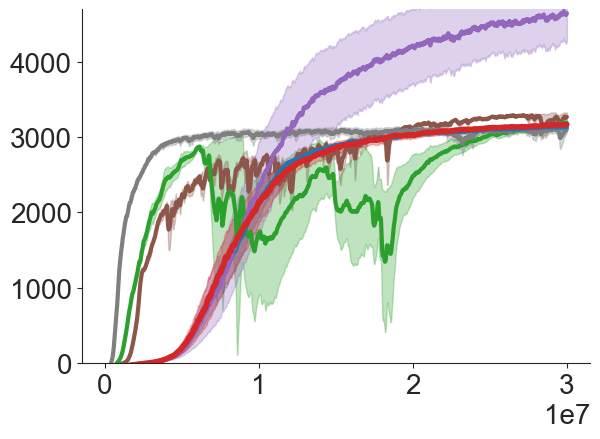

In [14]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []

    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 4700)) # set the ylim to bottom, top
plt.ylim(0, 4700) # set the ylim to bottom, top
# plt.legend()
plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

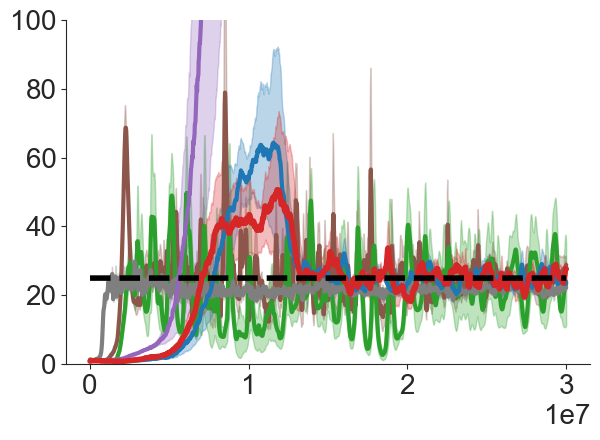

In [15]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []

    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=4
, label='Constraint')
# plt.legend()
bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 100)) # set the ylim to bottom, top
plt.ylim(0, 100) # set the ylim to bottom, top

plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

In [16]:
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from matplotlib.lines import Line2D
# plt.clf()
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# SMALL_SIZE = 20
# mpl.rc('font', size=SMALL_SIZE)
# mpl.rc('axes', titlesize=SMALL_SIZE)
# sns.set_style('ticks')
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.right'] = False
# # Create an empty figure without any axes
# fig, ax = plt.subplots(figsize=(1, 1))  # Adjust the figsize as needed
# ax.axis('off')  # Turn off the axes to hide the plot table

# cmap = plt.get_cmap('tab10')
# # Define the legend labels and colors
# runs = ['PPO-unconstraint','FOCOPS','constraint','CUP','CPO','PPO-lag','SIM']
# run_labels = {
#     'PPO-lag'               :'PPO-lag',
#     'SIM'      :'SIM (ours)',
#     'FOCOPS'                :'FOCOPS',
#     'CUP'                   :'CUP',
#     'CPO'                   :'CPO',
#     'PPO-unconstraint'      :'PPO-unconstraint',
#     'constraint'            :'constraint',
# }
# run_colors = {
#     'PPO-lag'               :cmap.colors[0],
#     'FOCOPS'                :cmap.colors[5],
#     'CUP'                   :cmap.colors[2],
#     'CPO'                   :cmap.colors[7],
#     'SIM'      :cmap.colors[3],
#     'PPO-unconstraint'      :cmap.colors[4],
#     'constraint'            :'black',
# }

# # Add the desired linestyle for the corresponding run
# run_linestyles = {
#     'PPO-lag': '-',
#     'SIM': '-',
#     'FOCOPS': '-',
#     'CUP': '-',
#     'CPO': '-',
#     'PPO-unconstraint': '-',
#     'constraint': '--',
# }

# # Create a custom legend with increased line length (handlelength)
# legend_elements = [Line2D([0], [0], color=run_colors[run], linestyle=run_linestyles[run],linewidth=5.0) for run in runs]
# ax.legend(legend_elements, [run_labels[run] for run in runs], ncol=3, handlelength=2)  # Adjust handlelength as desired

# # fig.update_layout(template='simple_white')
# # Save the figure as a pdf (or any other desired format) without any extra padding
# plt.savefig('velocity_legend_bar.pdf', bbox_inches='tight', pad_inches=0, dpi=600)

# # Display the figure interactively (optional)
# # plt.show('svg')